In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Administrator/Desktop/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#二值化
data['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
data['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [4]:
del data["Work_accident"]

In [5]:
y = data["left"]
del data["left"]
x = data

In [6]:
#标准化
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
x = standard.fit_transform(x)

In [7]:
#分割训练集和测试集
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(x_train, y_train)
logis_score_train = logis.score(x_train,y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(x_test, y_test)
print("Testing score: ",logis_score_test)

('Training score: ', 0.77698141511792651)
('Testing score: ', 0.76400000000000001)


In [10]:
coef = logis.coef_.reshape((8,1))
index = data.columns
coef_inf = pd.DataFrame(coef,index = index,columns = ["coef"])
coef_inf

,coef
satisfaction_level,-1.036592
last_evaluation,0.111713
number_project,-0.374426
average_montly_hours,0.247605
time_spend_company,0.346805
promotion_last_5years,-0.227521
sales,-0.086287
salary,-0.425903


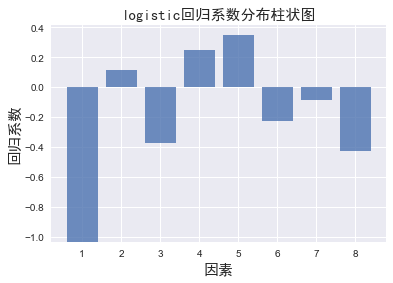

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(1,len(coef_inf)+1),coef_inf["coef"],alpha=0.8)
ax.set_xticks(np.arange(1,len(coef_inf)+1))
ax.set_title(u"logistic回归系数分布柱状图",fontproperties='SimHei',fontsize =15)
ax.set_xlabel(u"因素",fontproperties='SimHei',fontsize =15)
ax.set_ylabel(u"回归系数",fontproperties="SimHei",fontsize=15)
fig.savefig("C:/Users/Administrator/Desktop/13.png",dpi = 500)

In [12]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_score_train = dt.score(x_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(x_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 1.0)
('Testing score: ', 0.97666666666666668)


In [13]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_score_train = knn.score(x_train, y_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(x_test, y_test)
print("Testing score: ",knn_score_test)

('Training score: ', 0.97033086090507548)
('Testing score: ', 0.95833333333333337)
